In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [4]:
# Load Wine Quality Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv" # Verify URL for any typos
wine_data = pd.read_csv(url, sep=';')

In [5]:
# Extract 'alcohol' feature
alcohol = wine_data['alcohol'].values.reshape(-1, 1)

In [6]:
# Standardize the feature
scaler = StandardScaler()
alcohol_scaled = scaler.fit_transform(alcohol)

In [7]:
# 1. Parzen Window Density Estimation
def parzen_window_density(X, h_values):
    """
    Estimate density using Parzen Window method

    Parameters:
    X: Input data
    h_values: List of window sizes to experiment with

    Returns:
    Density estimates for different window sizes
    """
    densities = {}
    x_range = np.linspace(X.min(), X.max(), 200)

    for h in h_values:
        # Gaussian kernel density estimation
        density = np.zeros_like(x_range)
        for xi in X:
            # Kernel function (Gaussian)
            kernel = norm.pdf((x_range - xi) / h) / h
            density += kernel

        density /= len(X)
        densities[h] = (x_range, density)

    return densities


In [14]:
def nearest_neighbor_density(X, k_values):
    """
    Estimate density using Nearest Neighbor method

    Parameters:
    X: Input data
    k_values: List of k nearest neighbors to consider

    Returns:
    Density estimates for different k values
    """
    densities = {}
    x_range = np.linspace(X.min(), X.max(), 200)

    for k in k_values:
        # Nearest Neighbor density estimation
        nn = NearestNeighbors(n_neighbors=k+1)
        nn.fit(X)

        density = np.zeros_like(x_range)
        for x in x_range.reshape(-1, 1): # x_range is 1D, so loop iterates over scalars
            # Find k-nearest neighbors
            # Reshape x to a 2D array with one row and one column
            distances, _ = nn.kneighbors(x.reshape(1, -1))  # Reshape x here
            # Density is 1 / (volume of k-nearest neighbors)
            volume = (distances[0][-1] * 2) ** X.shape[1]
            density[x_range == x] = k / (len(X) * volume)

        densities[k] = (x_range, density)

    return densities

In [15]:
h_values = [0.1, 0.5, 1.0]

In [16]:
k_values = [5, 10, 20]

In [17]:
parzen_densities = parzen_window_density(alcohol_scaled, h_values)
nn_densities = nearest_neighbor_density(alcohol_scaled, k_values)

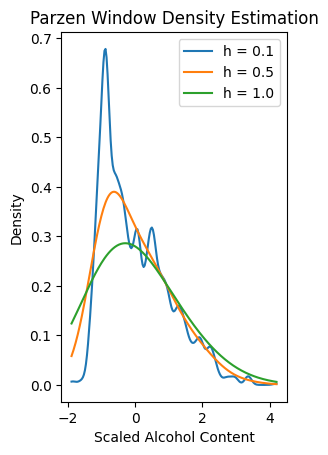

In [18]:
plt.subplot(1, 2, 1)
plt.title('Parzen Window Density Estimation')
plt.xlabel('Scaled Alcohol Content')
plt.ylabel('Density')
for h, (x, density) in parzen_densities.items():
    plt.plot(x, density, label=f'h = {h}')
plt.legend()

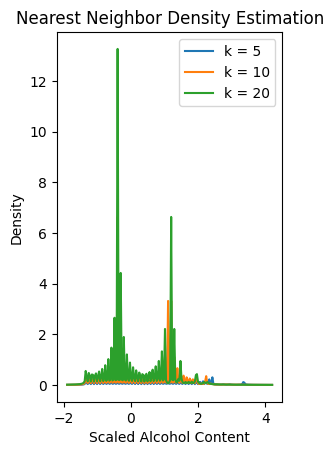

In [19]:
plt.subplot(1, 2, 2)
plt.title('Nearest Neighbor Density Estimation')
plt.xlabel('Scaled Alcohol Content')
plt.ylabel('Density')
for k, (x, density) in nn_densities.items():
    plt.plot(x, density, label=f'k = {k}')
plt.legend()


In [20]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [21]:
print("Density Estimation Summary:")
print("\nParzen Window Characteristics:")
for h, (x, density) in parzen_densities.items():
    print(f"\nWindow Size (h) = {h}:")
    print(f"  Peak Density: {density.max():.4f}")
    print(f"  Mean Density: {density.mean():.4f}")


Density Estimation Summary:

Parzen Window Characteristics:

Window Size (h) = 0.1:
  Peak Density: 0.6786
  Mean Density: 0.1629

Window Size (h) = 0.5:
  Peak Density: 0.3901
  Mean Density: 0.1607

Window Size (h) = 1.0:
  Peak Density: 0.2862
  Mean Density: 0.1499


In [22]:
print("\nNearest Neighbor Characteristics:")
for k, (x, density) in nn_densities.items():
    print(f"\nNearest Neighbors (k) = {k}:")
    print(f"  Peak Density: {density.max():.4f}")
    print(f"  Mean Density: {density.mean():.4f}")


Nearest Neighbor Characteristics:

Nearest Neighbors (k) = 5:
  Peak Density: 3.3146
  Mean Density: 0.1084

Nearest Neighbors (k) = 10:
  Peak Density: 6.6292
  Mean Density: 0.2013

Nearest Neighbors (k) = 20:
  Peak Density: 13.2584
  Mean Density: 0.3389
